In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler #For normalization 



stardle_db = pd.read_json('shipDB_Stardle.json').T
stardle_db = stardle_db.drop('description',axis = 1)
stardle_db

,name,dimensions,cargo_capacity,mass,crew,speed,manufacturer,type,status,role,price,release_date
100i,100i,19,2,48143,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Touring'}",50.0,2020
125a,125a,19,2,48143,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Fighter'}",60.0,2020
135c,135c,19,6,48143,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",65.0,2020
300i,300i,27,8,79677,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Touring', '1': 'Luxury'}",60.0,2014
315p,315p,27,12,80592,1,1425,Origin Jumpworks,exploration,flight-ready,{'0': 'Pathfinder'},65.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
X1 Force,X1 Force,1.55,0,4730,1,569,Origin Jumpworks,exploration,flight-ready,{'0': 'Combat'},50.0,2023
X1 Velocity,X1 Velocity,1.55,0,4730,1,611,Origin Jumpworks,competition,flight-ready,{'0': 'Racing'},45.0,2023
Zeus CL Mk II,Zeus CL Mk II,46,128,295000,3,1000,Roberts Space Industries,transport,flight-ready,{'0': 'Medium Freight'},150.0,2024
Zeus ES Mk II,Zeus ES Mk II,46,32,295000,3,1050,Roberts Space Industries,exploration,flight-ready,{'0': 'Expedition'},150.0,2024


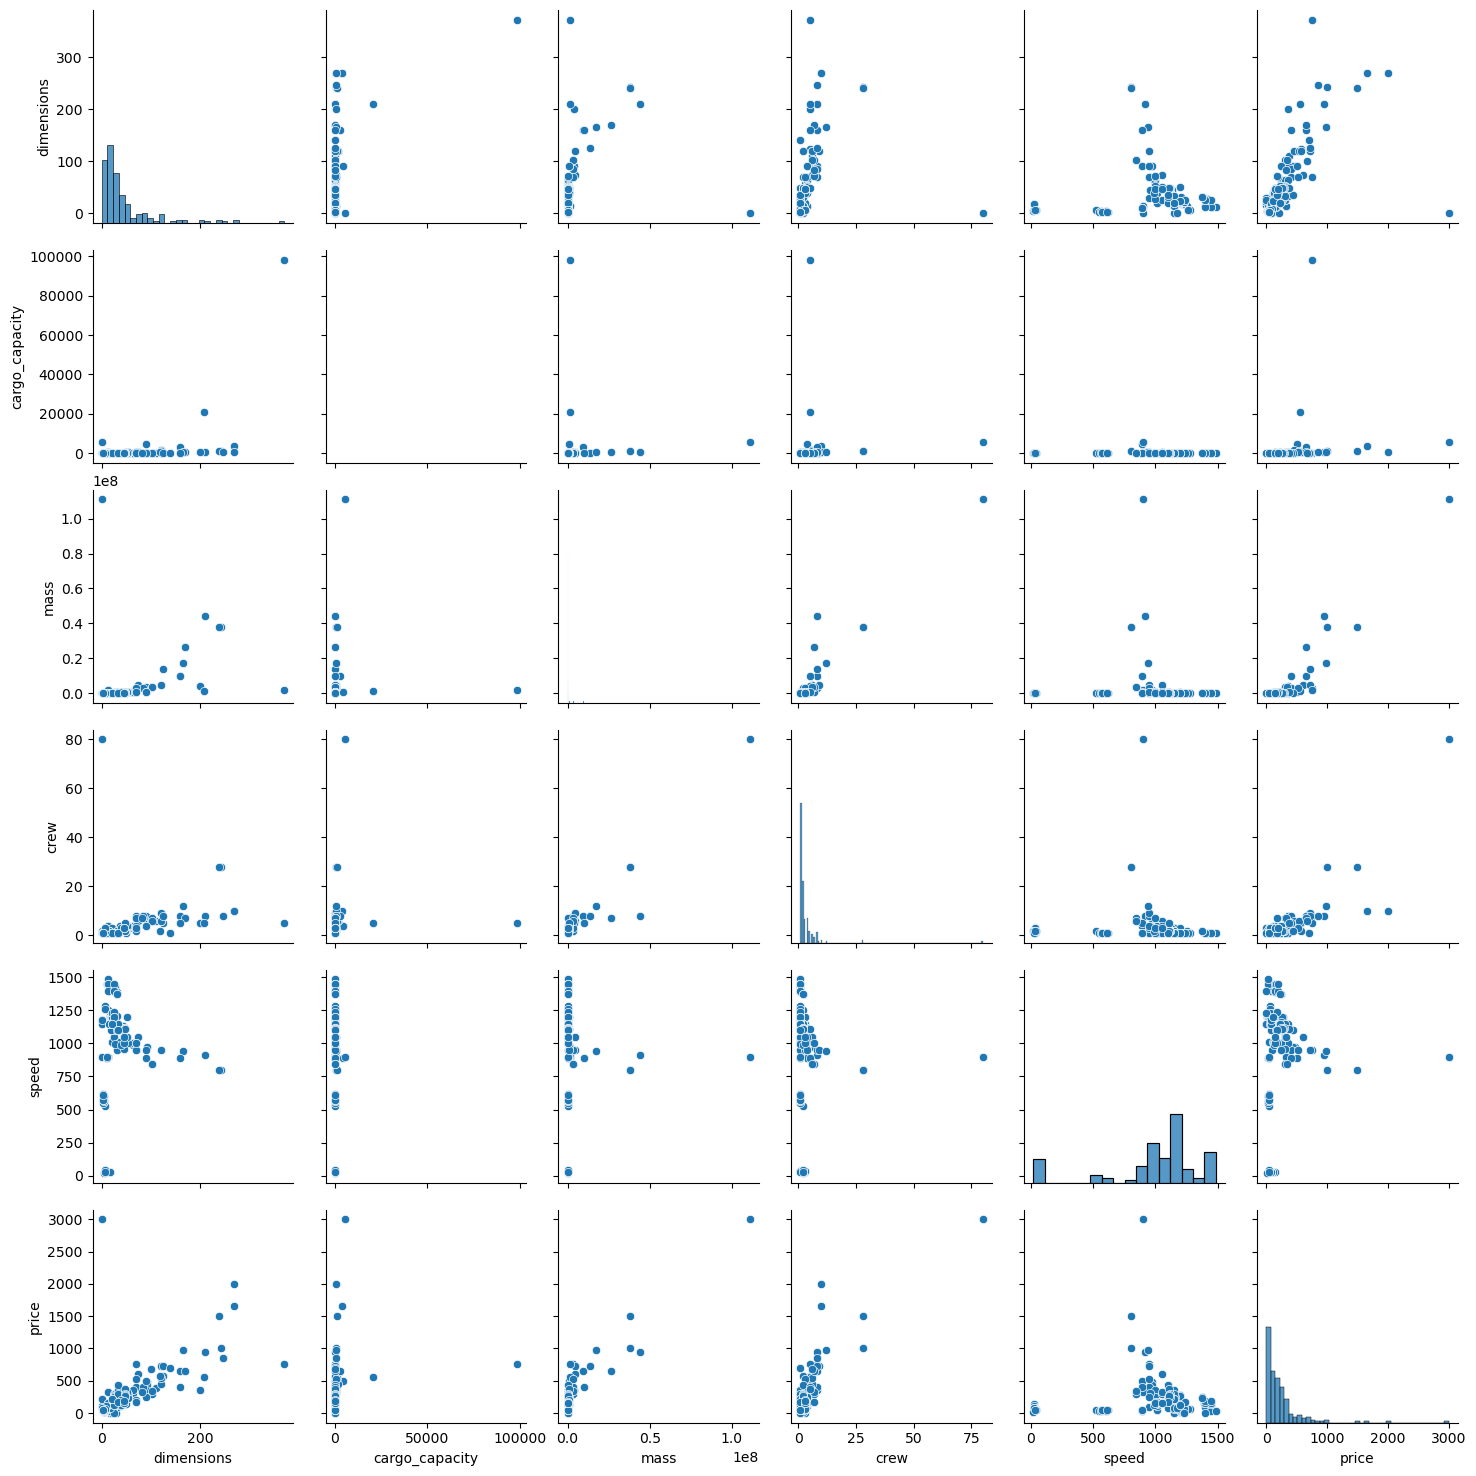

In [11]:
sns.pairplot(stardle_db)

In [12]:
stardle_db.sort_values('type')


,name,dimensions,cargo_capacity,mass,crew,speed,manufacturer,type,status,role,price,release_date
Zeus MR Mk II,Zeus MR Mk II,46,16,None,3,None,Roberts Space Industries,combat,in-concept,{'0': 'Interdiction'},190.0,Unreleased
Gladius,Gladius,21,0,51352,1,1230,Aegis Dynamics,combat,flight-ready,{'0': 'Light Fighter'},90.0,2015
Gladiator,Gladiator,22.75,0,88408,2,1125,Anvil Aerospace,combat,flight-ready,{'0': 'Bomber'},165.0,2015
Sabre Raven,Sabre Raven,24.5,0,70811,1,1400,Aegis Dynamics,combat,flight-ready,{'0': 'Interdiction'},0.0,2017
San'tok.yāi,San'tok.yāi,24,0,88524,1,1161,Aopoa,combat,flight-ready,{'0': 'Medium Fighter'},240.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
Freelancer,Freelancer,38,66,231696,4,1010,Musashi Industrial and Starflight Concern,transport,flight-ready,{'0': 'Medium Freight'},110.0,2016
E1 Spirit,E1 Spirit,46.5,0,None,2,None,Crusader Industries,transport,in-concept,{'0': 'Passenger'},150.0,Unreleased
Cutter,Cutter,20,4,86877,1,1010,Drake Interplanetary,transport,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",45.0,2022
Starlancer MAX,Starlancer MAX,90,224,814271,4,950,Musashi Industrial and Starflight Concern,transport,flight-ready,{'0': 'Medium Freight'},250.0,2024


In [13]:
exploration_ships = stardle_db[stardle_db['type'] == 'exploration']
exploration_ships

,name,dimensions,cargo_capacity,mass,crew,speed,manufacturer,type,status,role,price,release_date
315p,315p,27,12,80592,1,1425,Origin Jumpworks,exploration,flight-ready,{'0': 'Pathfinder'},65.0,2014
400i,400i,56,42,430057,3,1000,Origin Jumpworks,exploration,flight-ready,{'0': 'Touring'},250.0,2021
600i Explorer,600i Explorer,91.5,44,1622067,5,975,Origin Jumpworks,exploration,flight-ready,{'0': 'Expedition'},475.0,2018
600i Touring,600i Touring,91.5,20,1613414,5,975,Origin Jumpworks,exploration,flight-ready,{'0': 'Touring'},435.0,2018
85X,85X,13.5,0,19834,2,1250,Origin Jumpworks,exploration,flight-ready,{'0': 'Touring'},50.0,2016
890 Jump,890 Jump,210,388,44237159,8,915,Origin Jumpworks,exploration,flight-ready,{'0': 'Luxury Touring'},950.0,2019
Aurora LX,Aurora LX,19,3,26736,1,1200,Roberts Space Industries,exploration,flight-ready,{'0': 'Pathfinder'},35.0,2014
C8 Pisces,C8 Pisces,16,4,48143,3,1150,Anvil Aerospace,exploration,flight-ready,{'0': 'Exploration'},0.0,2019
C8X Pisces Expedition,C8X Pisces Expedition,16,4,48143,3,1150,Anvil Aerospace,exploration,flight-ready,{'0': 'Expedition'},45.0,2019
Carrack,Carrack,74,456,4397858,6,1050,Anvil Aerospace,exploration,flight-ready,{'0': 'Expedition'},600.0,2019


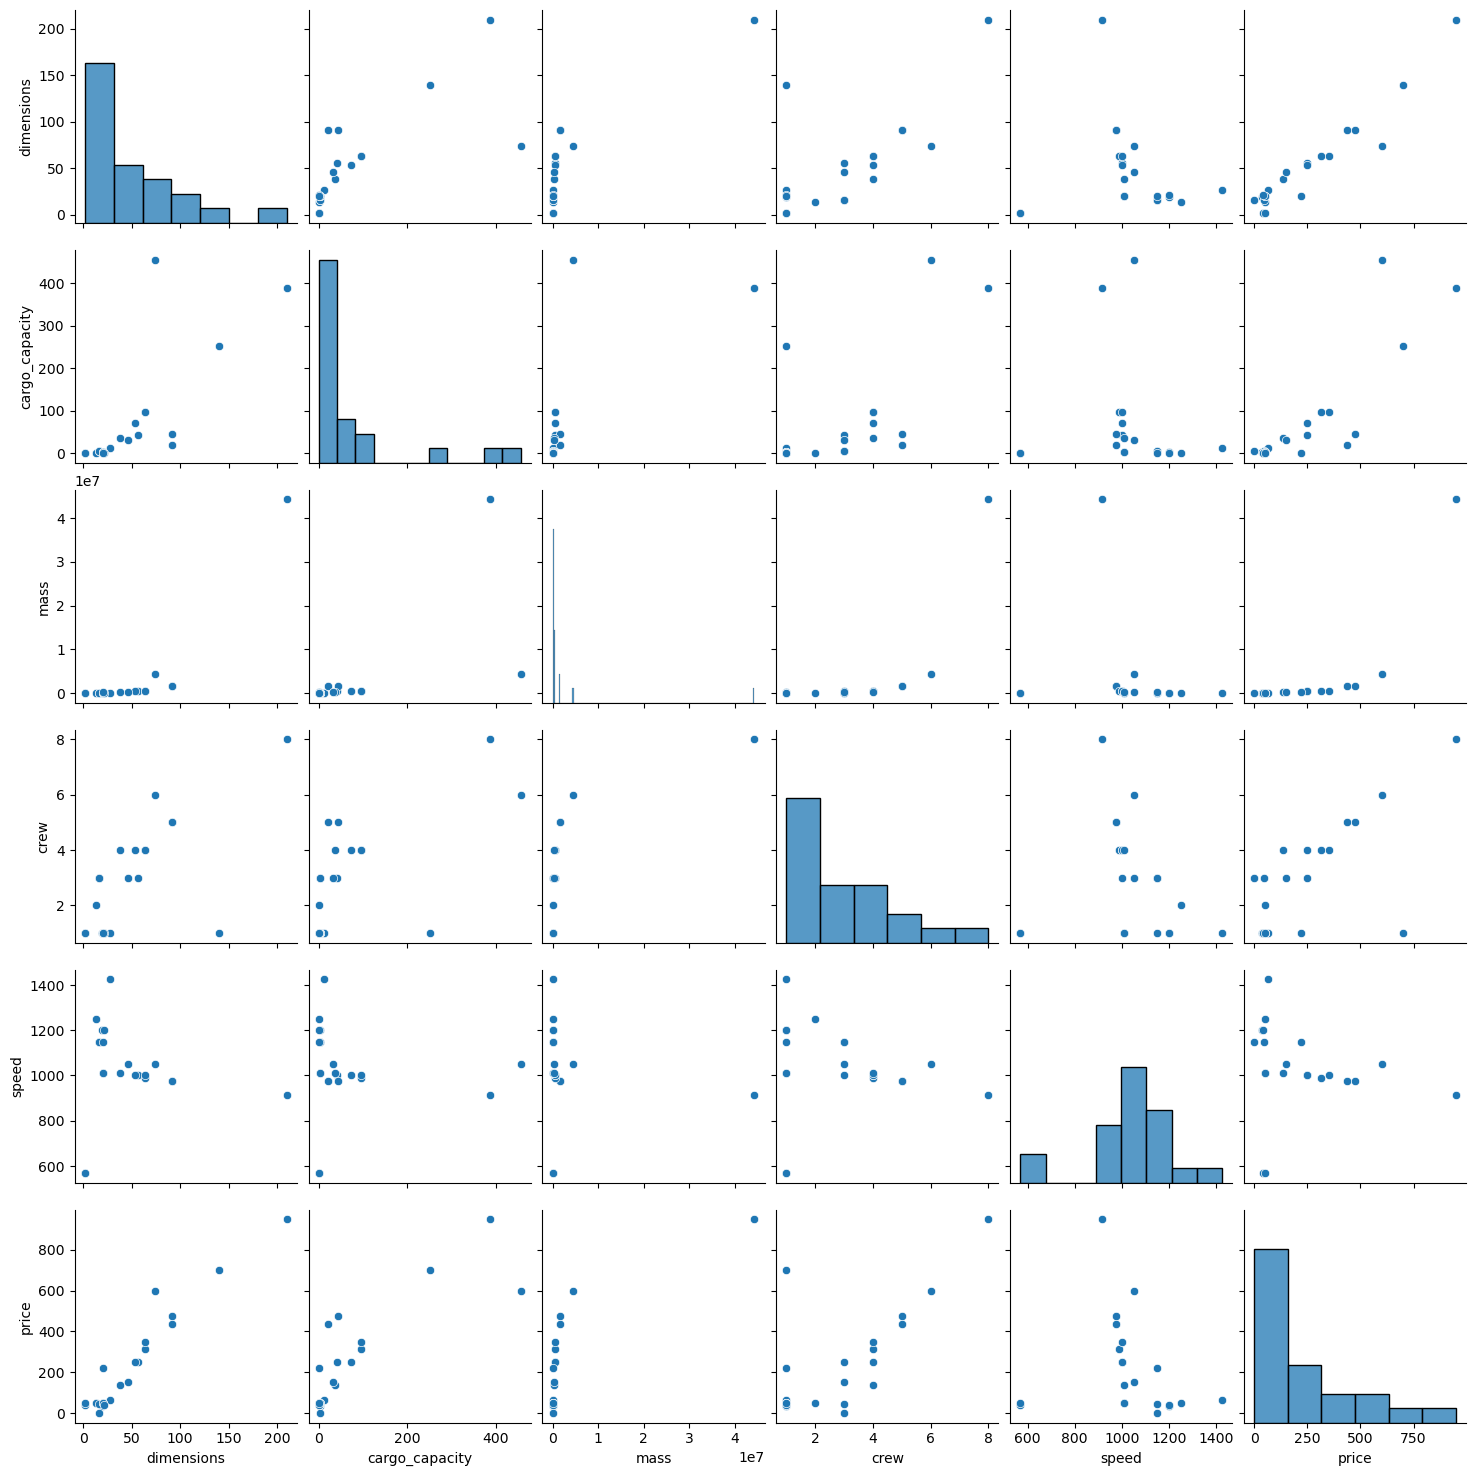

In [18]:
sns.pairplot(exploration_ships)

In [15]:
combat_ships = stardle_db[stardle_db['type'] == 'combat']
combat_ships

,name,dimensions,cargo_capacity,mass,crew,speed,manufacturer,type,status,role,price,release_date
325a,325a,27.5,4,79324,1,1425,Origin Jumpworks,combat,flight-ready,"{'0': 'Light Fighter', '1': 'Interdiction'}",70.0,2014
A1 Spirit,A1 Spirit,44,0,314271,2,1130,Crusader Industries,combat,flight-ready,{'0': 'Bomber'},200.0,2023
A2 Hercules,A2 Hercules,70,216,3139240,8,950,Crusader Industries,combat,flight-ready,{'0': 'Heavy Bomber'},750.0,2021
Ares Star Fighter Inferno,Ares Star Fighter Inferno,27,0,329001,1,1100,Crusader Industries,combat,flight-ready,{'0': 'Heavy Fighter'},250.0,2021
Ares Star Fighter Ion,Ares Star Fighter Ion,27,0,329001,1,1100,Crusader Industries,combat,flight-ready,{'0': 'Heavy Fighter'},250.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
Vanguard Harbinger,Vanguard Harbinger,48,0,236604,2,1115,Aegis Dynamics,combat,flight-ready,{'0': 'Bomber'},290.0,2019
Vanguard Hoplite,Vanguard Hoplite,48,0,234870,2,1115,Aegis Dynamics,combat,flight-ready,{'0': 'Dropship'},240.0,2016
Vanguard Sentinel,Vanguard Sentinel,48,0,232170,2,1111,Aegis Dynamics,combat,flight-ready,{'0': 'Interdiction'},275.0,2019
Vanguard Warden,Vanguard Warden,48,0,244270,2,1111,Aegis Dynamics,combat,flight-ready,{'0': 'Heavy Fighter'},260.0,2016


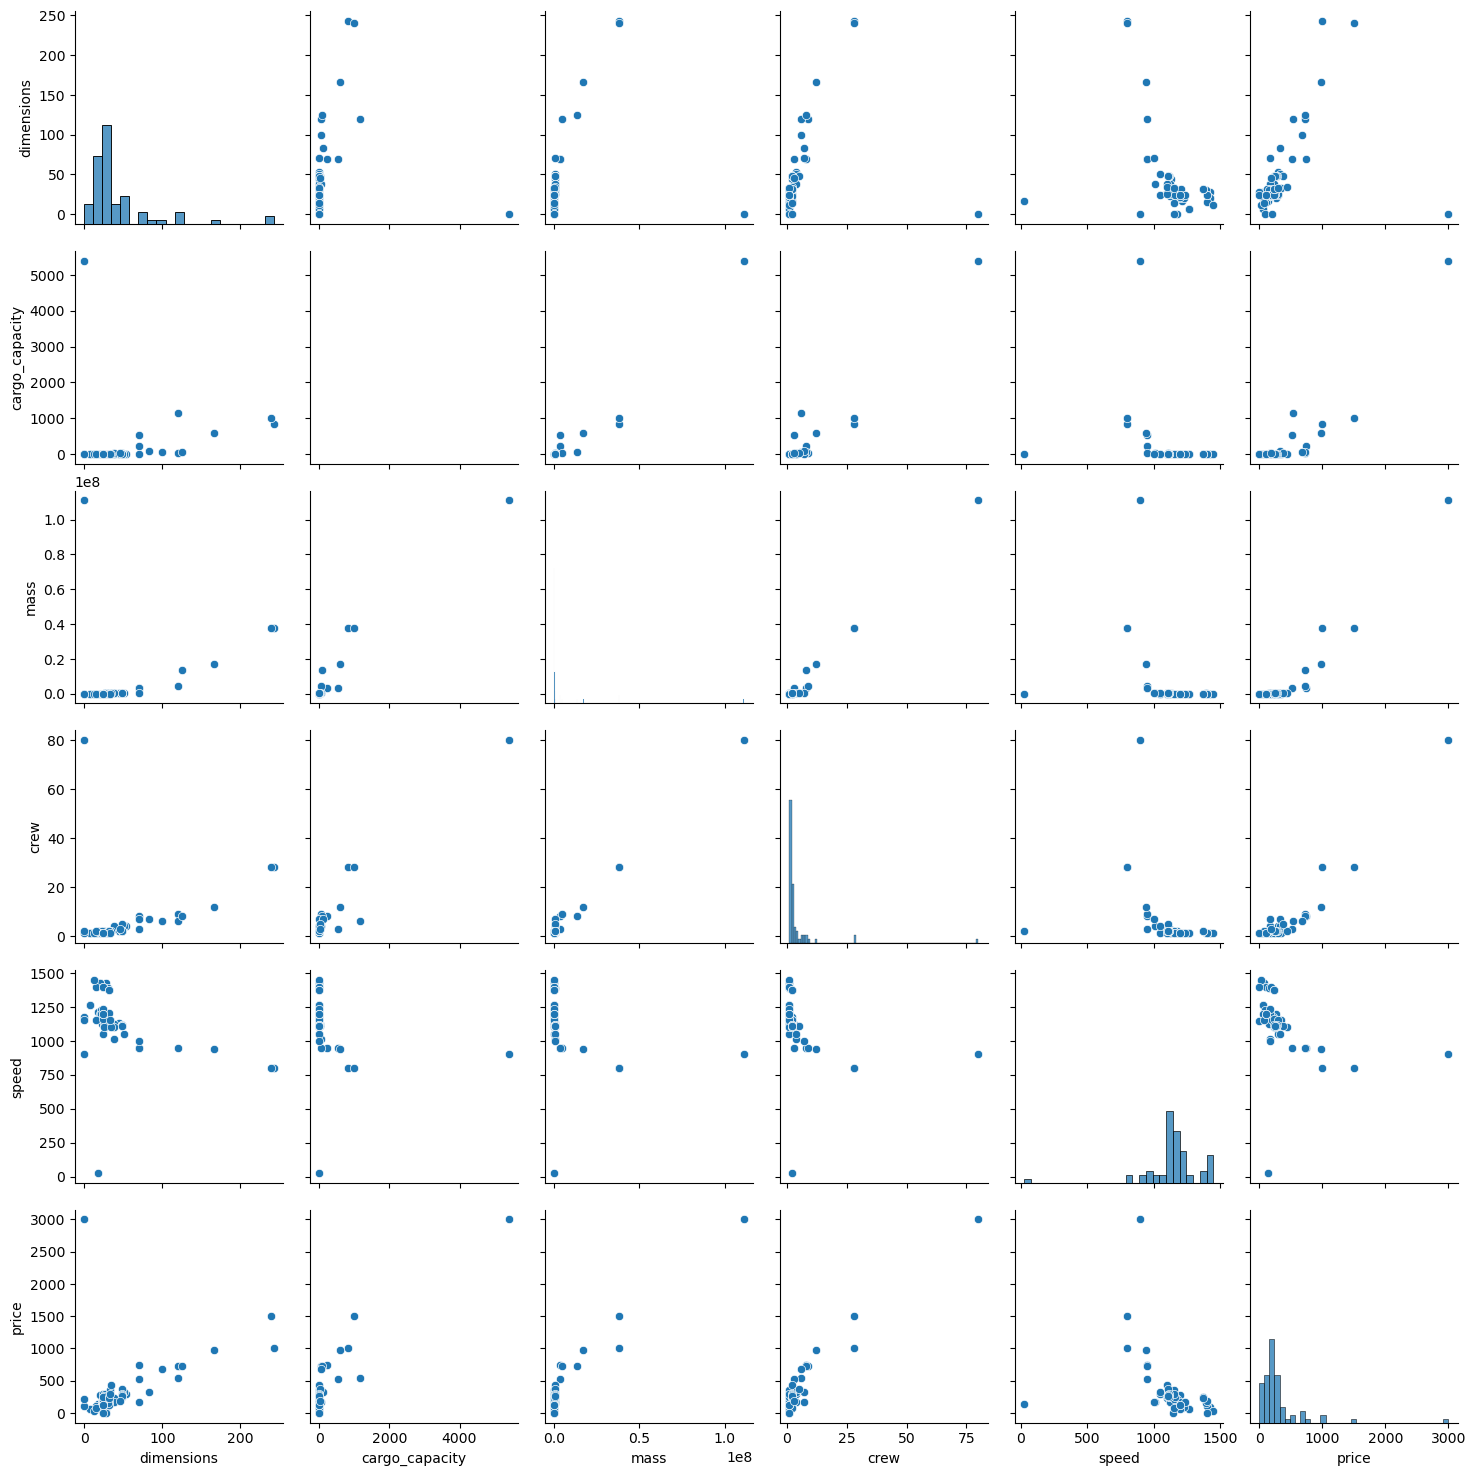

In [19]:
sns.pairplot(combat_ships)

In [17]:
transport_ships = stardle_db[stardle_db['type'] == 'transport']
transport_ships

,name,dimensions,cargo_capacity,mass,crew,speed,manufacturer,type,status,role,price,release_date
Aurora CL,Aurora CL,19,6,26422,1,1200,Roberts Space Industries,transport,flight-ready,{'0': 'Light Freight'},45.0,2014
Aurora LN,Aurora LN,19,3,28714,1,1200,Roberts Space Industries,transport,flight-ready,{'0': 'Light Fighter'},40.0,2014
Aurora MR,Aurora MR,19,3,27893,1,1200,Roberts Space Industries,transport,flight-ready,{'0': 'Light Fighter'},30.0,2014
Avenger Titan,Avenger Titan,20,8,51363,1,1425,Aegis Dynamics,transport,flight-ready,{'0': 'Light Freight'},60.0,2014
C1 Spirit,C1 Spirit,44,64,314271,2,1130,Crusader Industries,transport,flight-ready,{'0': 'Medium Freight'},125.0,2023
C2 Hercules,C2 Hercules,70,696,3139240,2,950,Crusader Industries,transport,flight-ready,{'0': 'Heavy Freight'},400.0,2021
Caterpillar,Caterpillar,13.4,576,1660063,4,900,Drake Interplanetary,transport,flight-ready,{'0': 'Heavy Freight'},330.0,2016
Caterpillar Pirate Edition,Caterpillar Pirate Edition,13.4,576,1660063,4,900,Drake Interplanetary,transport,flight-ready,{'0': 'Heavy Freight'},330.0,2016
Constellation Taurus,Constellation Taurus,70,174,427001,4,1000,Roberts Space Industries,transport,flight-ready,{'0': 'Medium Freight'},200.0,2021
Cutter,Cutter,20,4,86877,1,1010,Drake Interplanetary,transport,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",45.0,2022


In [21]:
multi_ships = stardle_db[stardle_db['type'] == 'multi']
multi_ships

,name,dimensions,cargo_capacity,mass,crew,speed,manufacturer,type,status,role,price,release_date
100i,100i,19,2,48143,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Touring'}",50.0,2020
125a,125a,19,2,48143,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Fighter'}",60.0,2020
135c,135c,19,6,48143,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",65.0,2020
300i,300i,27,8,79677,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Touring', '1': 'Luxury'}",60.0,2014
Aurora ES,Aurora ES,19,3,26486,1,1200,Roberts Space Industries,multi,flight-ready,"{'0': 'Starter', '1': 'Pathfinder'}",20.0,2014
Constellation Andromeda,Constellation Andromeda,63.5,96,430057,4,1000,Roberts Space Industries,multi,flight-ready,"{'0': 'Medium Freight', '1': 'Gunship'}",240.0,2015
Cutlass Black,Cutlass Black,37.5,46,246577,3,1125,Drake Interplanetary,multi,flight-ready,{'0': 'Medium Freight'},110.0,2014
Galaxy,Galaxy,110,64,None,6,None,Roberts Space Industries,multi,in-concept,{'0': 'Modular'},380.0,Unreleased
Mustang Alpha,Mustang Alpha,21.5,4,34221,1,1200,Consolidated Outland,multi,flight-ready,{'0': 'Cargo'},30.0,2014
Nomad,Nomad,19,24,228123,1,1100,Consolidated Outland,multi,flight-ready,{'0': 'Starter'},80.0,2020
